In [230]:
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import mne
import importlib
import ccs_eeg_utils
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

In [231]:
def plot_data(data, sampling_rate=500, start=0, end=7):
    # Calculate start and end indices
    start_idx = int(start * sampling_rate)
    end_idx = int(end * sampling_rate) + 1

    # Generate time axis
    time_axis = np.arange(start_idx, end_idx) / sampling_rate

    # Plot the data
    plt.plot(time_axis, data[0][0].T[start_idx:end_idx])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(f"EEG Signal from {start} to {end} seconds")
    plt.show()

In [232]:
bids_root = "./data/"
subject_id = '001'


bids_path = BIDSPath(subject=subject_id, run="02", task="ContinuousVideoGamePlay",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)
clear_output()

In [233]:
raw.load_data()
raw_unmodified = raw.copy()

Reading 0 ... 1398674  =      0.000 ...  2797.348 secs...


In [234]:
raw = raw_unmodified.copy()

In [235]:
list_name

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'FCz',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'AF4',
 'AF8',
 'VEOG',
 'HEOG']

In [236]:
list_name = raw.ch_names
list_type = ['eeg' if i < len(list_name)-2 else 'eog' for i in range(len(list_name))]
raw.set_channel_types(dict(zip(list_name, list_type)))

/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/1846276302.py:3: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, Cz, F1, F2, F3, F4, F5, F6, F7, F8, FC1, FC2, FC3, FC4, FC5, FC6, FCz, FT10, FT7, FT8, FT9, Fp1, Fp2, Fz, HEOG, O1, O2, Oz, P1, P2, P3, P4, P5, P6, P7, P8, PO3, PO4, PO7, PO8, POz, Pz, T7, T8, TP10, TP7, TP8, TP9, VEOG has changed from NA to V.
  raw.set_channel_types(dict(zip(list_name, list_type)))


<RawEEGLAB | sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt, 65 x 1398675 (2797.3 s), ~693.7 MiB, data loaded>

In [237]:
path = "data/sub-001/eeg/sub-001_task-ContinuousVideoGamePlay_run-02_electrodes.tsv"
electrodes = pd.read_csv(path, sep='\t')
original_montage = raw.get_montage()
nasion = original_montage.get_positions()["nasion"]
lpa = original_montage.get_positions()["lpa"]
rpa = original_montage.get_positions()["rpa"]
hsp = original_montage.get_positions()["hsp"]
hpi = original_montage.get_positions()["hpi"]
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(electrodes['name'], electrodes[['x','y','z']].values)), 
                                        nasion=nasion, lpa=lpa, rpa=rpa, hsp=hsp, hpi=hpi)
raw.set_montage(montage)

/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/2435659104.py:11: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['VEOG', 'HEOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


<RawEEGLAB | sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt, 65 x 1398675 (2797.3 s), ~693.7 MiB, data loaded>

In [238]:
raw_filtered = raw.copy()
raw_filtered.filter(1, None, picks="all")
ica = mne.preprocessing.ICA(n_components=20, method="picard") # picard is fast and supposedly good; infomax is slow but good
ica.fit(raw_filtered, picks="all", verbose=True)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Fitting ICA to data using 65 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 53.5s.


<ICA | raw data decomposition, method: picard (fit in 76 iterations on 1398675 samples), 20 ICA components (65 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=22, n_times=1398675
    Range : 0 ... 1398674 =      0.000 ...  2797.348 secs
Ready.


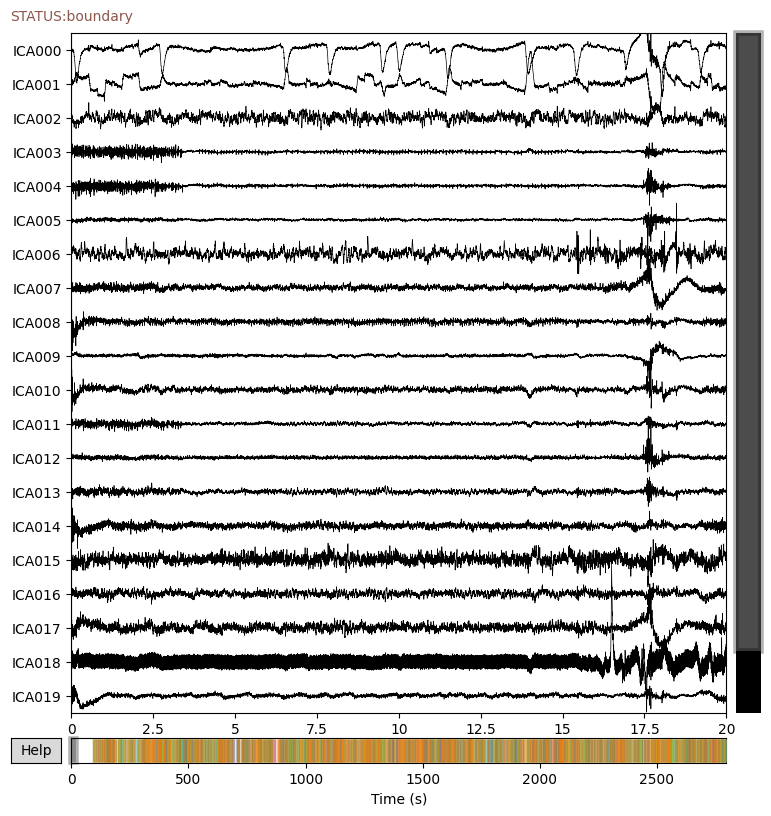

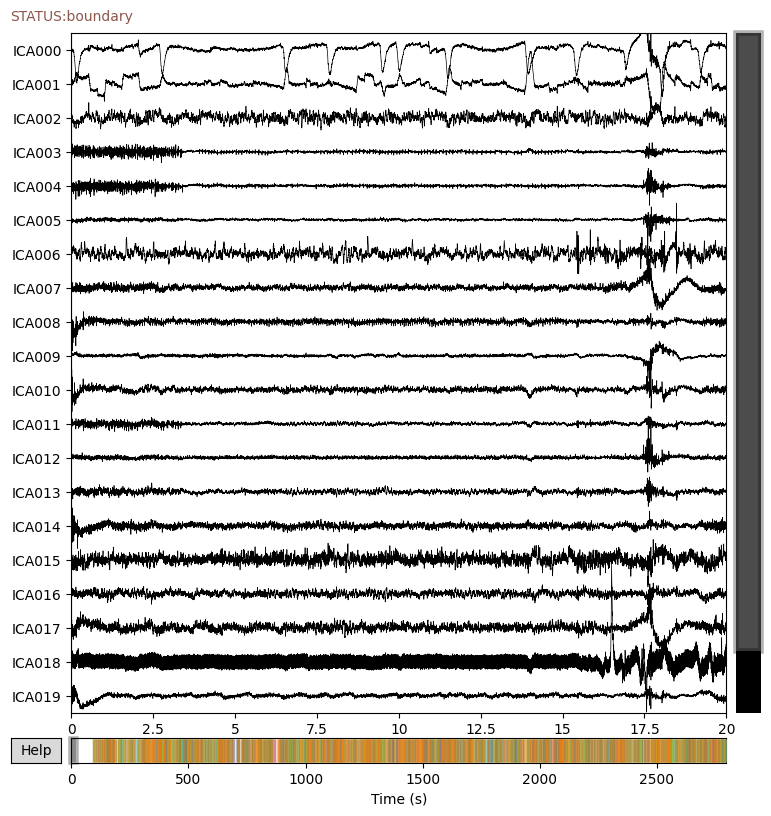

In [239]:
ica.plot_sources(raw_filtered)

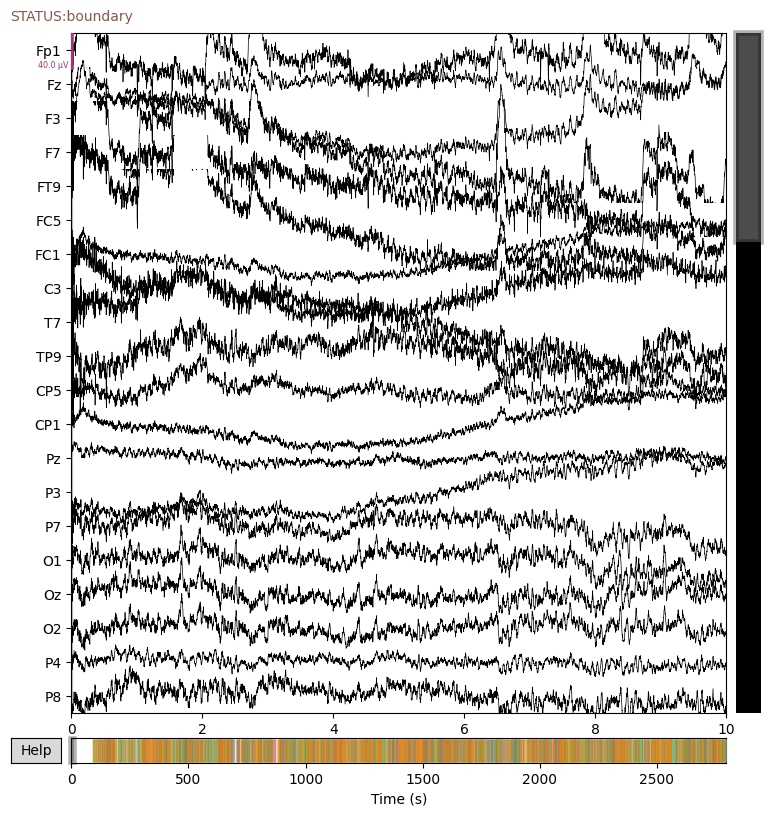

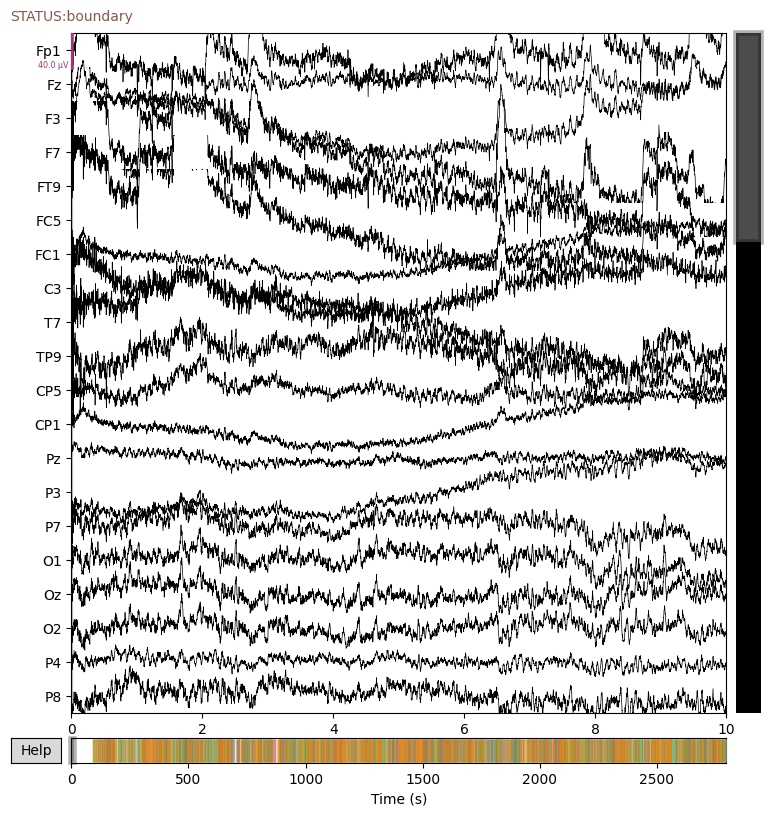

In [240]:
raw.plot()

In [241]:
ica.exclude = [0, 1]
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 65 PCA components


<RawEEGLAB | sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt, 65 x 1398675 (2797.3 s), ~693.7 MiB, data loaded>

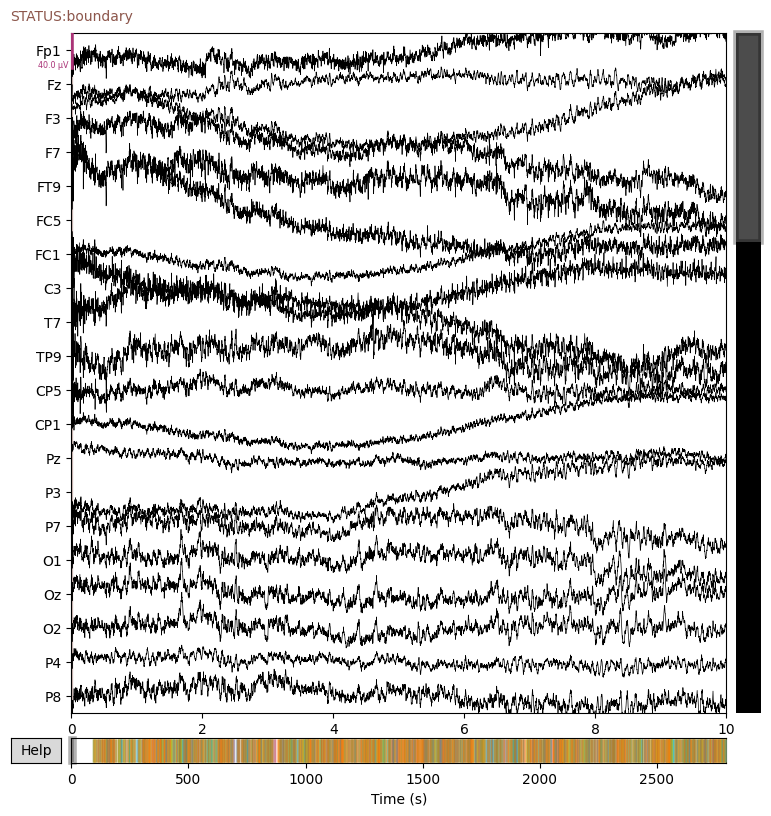

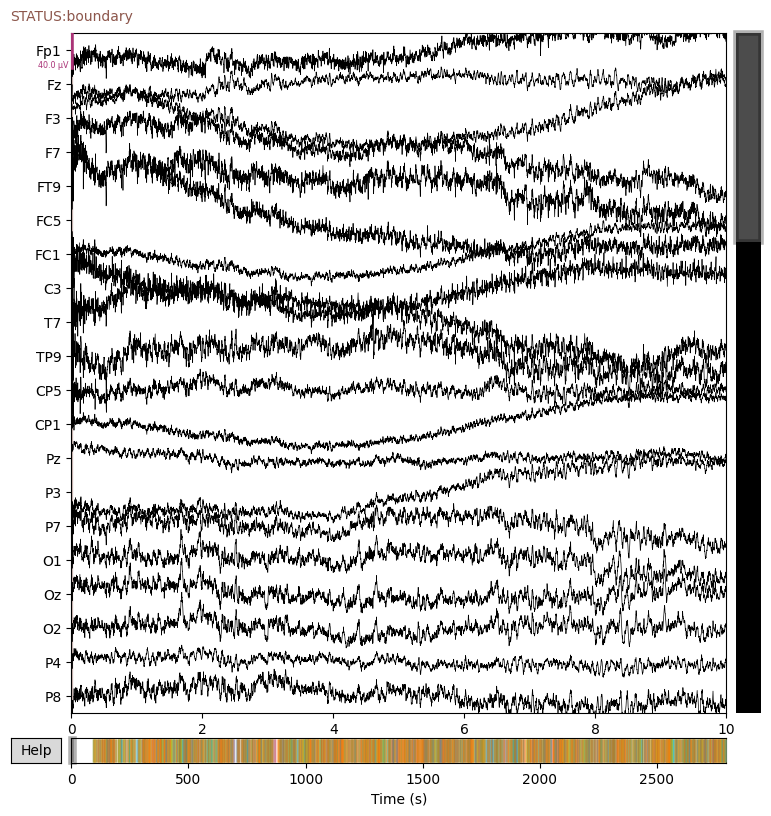

In [242]:
raw.plot(show_scrollbars=True)

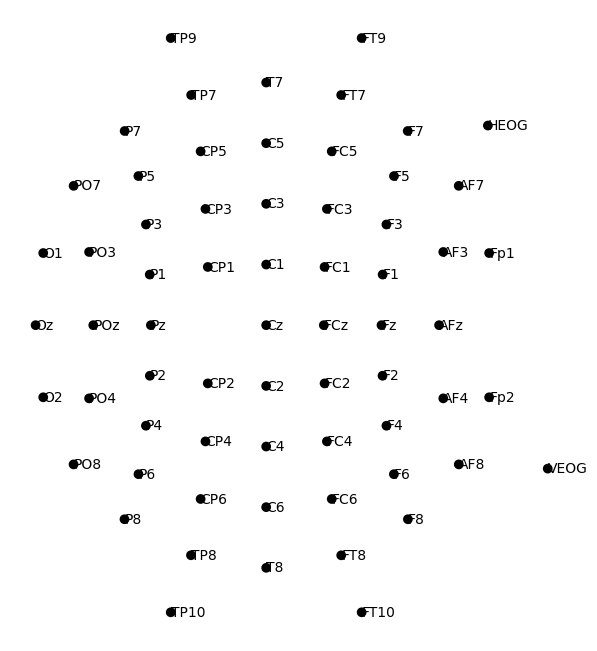

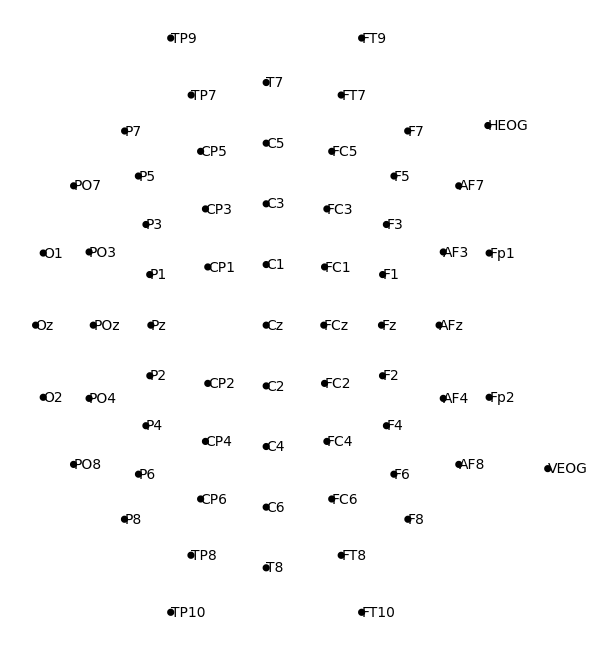

In [243]:
montage.plot()

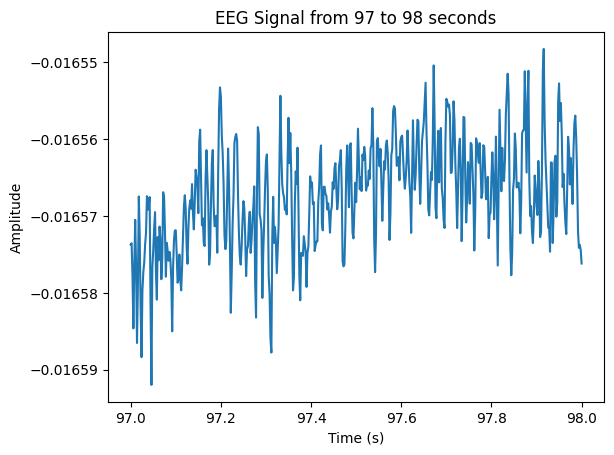

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 165001 samples (330.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


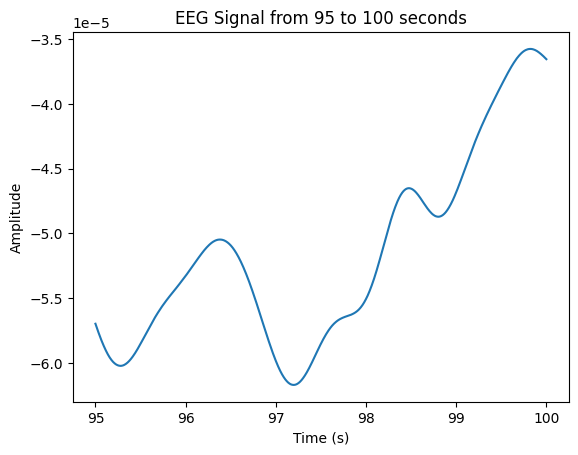

<RawEEGLAB | sub-001_task-ContinuousVideoGamePlay_run-02_eeg.fdt, 65 x 1398675 (2797.3 s), ~1.35 GiB, data loaded>

In [244]:
#Pipeline as suggested by paper
#raw = raw_unmodified.copy()
plot_data(raw, start=97, end=98)
raw.filter(0.01, 0.1, picks="all")
plot_data(raw, start=95, end=100)
# raw.resample(1)
# plot_data(raw, 1)
raw.apply_hilbert(picks="all")
#plot_data(raw, start=95, end=100)

## Compute bin standard deviation
- For each event calculate difference to standard deviation

In [245]:
def create_bins(data, num_bins=8):
    bin_size = 2 * np.pi / num_bins
    bins = [[] for i in range(num_bins)]
    for element in data:
        bin_index = int((element + np.pi) // bin_size)
        bins[bin_index].append(element)
    return bins

def get_bin_probabilities(bins):
    sum = 0
    for bin in bins:
        sum += len(bin)
    return [len(bin)/sum for bin in bins]

def get_bin_deviation(data, timestamps, baseline_method, timespan = 1 * 500, num_bins = 8):
    if baseline_method == "exclude_event":
        base_data = list(data[0:int(timestamps[0]-timespan/2)])
        for i in range(len(timestamps)-1):
            base_data.extend(data[int((timestamps[i]+timespan/2)):int((timestamps[i+1]-timespan/2))])
        base_data.extend(data[int((timestamps[len(timestamps)-1]+timespan/2)):len(data)])
    if baseline_method == "include_event":
        base_data = data
    if baseline_method == "naive":
        default = [0.125]*8
    else:
        bins = create_bins(base_data, num_bins)
        default = get_bin_probabilities(bins)

    combined_data = []
    for timestamp in timestamps:
        combined_data.extend(data[int((timestamp-timespan/2)):int((timestamp+timespan/2))])

    event_bins = create_bins(combined_data, num_bins)
    event_probability = get_bin_probabilities(event_bins)

    deviation = []
    for i in range(len(default)):
        deviation.append(100*(event_probability[i]/default[i] - 1))

    return deviation

def get_total_deviation(data, timestamps, baseline_method, timespan = 1, sampling_rate = 500, num_bins = 8):
    print(len(timestamps))
    total_deviation = [0 for i in range(num_bins)]
    for i in range(len(data)):
        deviation = get_bin_deviation(data[i], [timestamp*sampling_rate for timestamp in timestamps], baseline_method, timespan*sampling_rate, num_bins)
        for i in range(len(deviation)):
            total_deviation[i] += deviation[i]
    
    for i in range(len(total_deviation)):
        total_deviation[i] /= len(data)
    return total_deviation


In [246]:
test = np.angle(raw.get_data(picks="all"))
data = test[10:11]

1


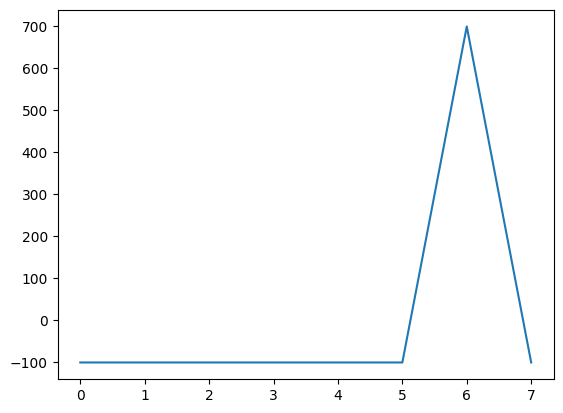

In [247]:
total_deviation = get_total_deviation(data, [115.014], "naive", sampling_rate=500)
plt.plot([i for i in range(8)], total_deviation)
plt.show()

## All subjects:

In [248]:
def get_deviation_for_subjects(subjects, behavior, channels, num_bins=8, sampling_rate=500, window=1, baseline_methods=["exclude_event"]):
    method_count = len(baseline_methods)
    
    deviation_aggregated = np.zeros((method_count, num_bins))
    count = np.zeros(method_count)
    deviations = [[] for _ in range(method_count)]

    for sub in range(1, 1+subjects):
        print(f"Subject {sub}...")
        bids_root = "./data/"
        subject_id = str(sub).zfill(3)

        bids_path = BIDSPath(subject=subject_id, run="02", task="ContinuousVideoGamePlay",
                            datatype='eeg', suffix='eeg',
                            root=bids_root)

        # read the file
        raw = read_raw_bids(bids_path)
        # fix the annotations readin
        ccs_eeg_utils.read_annotations_core(bids_path,raw)
        clear_output()
        raw.load_data()
        raw.filter(0.01, 0.1, picks="all", verbose=False)
        raw.apply_hilbert(picks="all")

        df = pd.read_csv(f'data/sub-{subject_id}/eeg/sub-{subject_id}_task-ContinuousVideoGamePlay_run-02_events.tsv', sep='\t')
        filtered_df = df[df['trial_type'] == behavior]

        # for i in range(0, 65):
        res = np.angle(raw.get_data(picks="all"))
        data = res[channels]
        for method_idx, method in enumerate(baseline_methods):
            curr_deviation = get_total_deviation(data, [entry for entry in filtered_df["onset"]], method, sampling_rate=sampling_rate, timespan=window, num_bins=num_bins, )
            curr_deviation = np.array(curr_deviation)
            deviations[method_idx].append(curr_deviation)
            weight = len(filtered_df)
            deviation_aggregated[method_idx] += curr_deviation * weight
            count[method_idx] += weight

    for i in range(method_count):
        deviation_aggregated[i] /= count[i]
    deviations = [np.array(method_devs) for method_devs in deviations]
    return deviation_aggregated, deviations


In [249]:
behaviors = ["STATUS", "GAME OVER", "SHOOT_BUTTON", "MISSILE_HIT_ENEMY", "COLLECT_STAR", "PLAYER_CRASH_ENEMY", "PLAYER_CRASH_WALL", "COLLECT_AMMO"]
deviation_aggregated = []

In [250]:
def get_confidence_intervals(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standard_error = std / np.sqrt(n)
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_critical * standard_error
    return mean - margin_of_error, mean + margin_of_error

In [251]:
def plot_seperated(aggregated, not_aggregated):
    color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps

    for i, deviation in enumerate(not_aggregated):
        plt.plot([j for j in range(8)], deviation, color=color_map(i))

    plt.plot([j for j in range(8)], aggregated, color="black", linewidth=3, linestyle='dashed')

    plt.show()

In [252]:
def plot_aggregated(aggregated, confidence_intervals=None, labels=None):
    color_map = cm.get_cmap('tab10', len(aggregated))
    if labels is None:
        labels = [f"Series {i+1}" for i in range(len(aggregated))]  # Default labels
    for i in range(len(aggregated)):
        x_vals = np.arange(len(aggregated[i]))
        color = color_map(i)
        plt.plot(x_vals, aggregated[i], color=color, label=labels[i])
        if confidence_intervals is not None:
            lower, upper = confidence_intervals[i]
            plt.fill_between(x_vals, lower, upper, color=color, alpha=0.2)
    plt.legend()
    plt.show()

In [253]:
def plot_all(aggregated, not_aggregated):
    plot_seperated(aggregated[0], not_aggregated[0])
    plot_aggregated(aggregated, labels=["Excluded", "Included", "Naive"])
    confidence_intervals = [get_confidence_intervals(not_aggregated[0], confidence=0.95)]
    plot_aggregated([aggregated[0]], confidence_intervals, labels=["Excluded"])

Reading 0 ... 954499  =      0.000 ...  1908.998 secs...
652
652
652


/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/9202195.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps


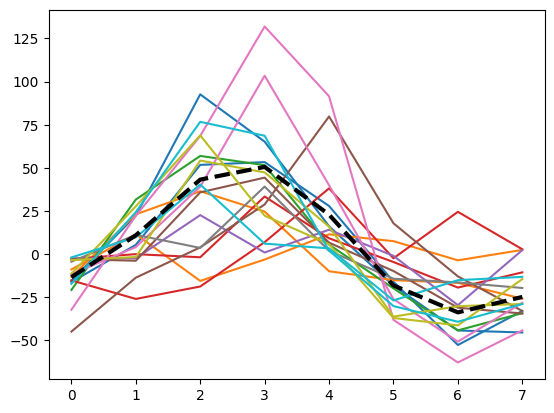

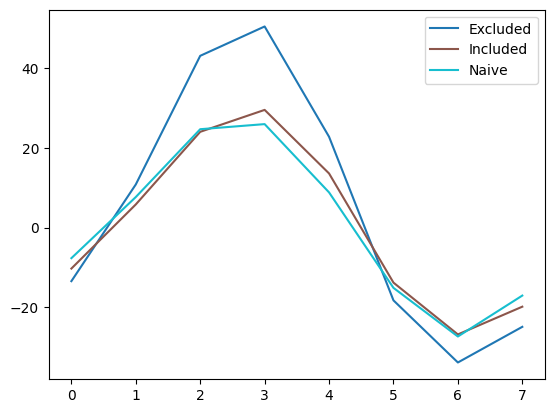

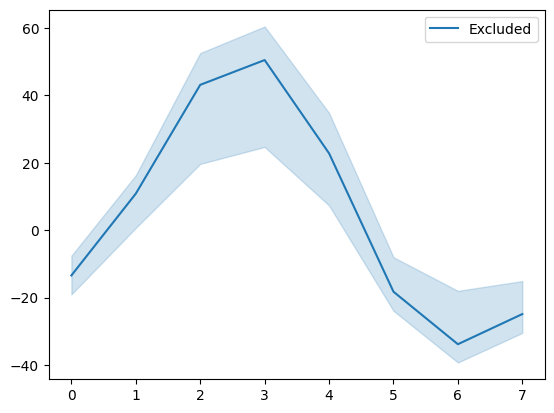

In [254]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "SHOOT_BUTTON", range(3, 4), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)

In [255]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "MISSILE_HIT_ENEMY", range(8,9), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)

Reading 0 ... 967799  =      0.000 ...  1935.598 secs...


KeyboardInterrupt: 

Reading 0 ... 954499  =      0.000 ...  1908.998 secs...
753
753
753


/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/9202195.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps


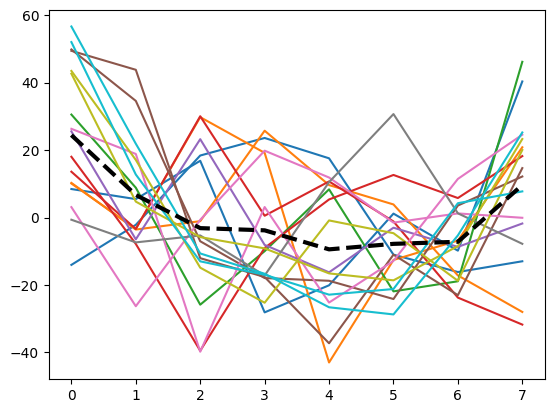

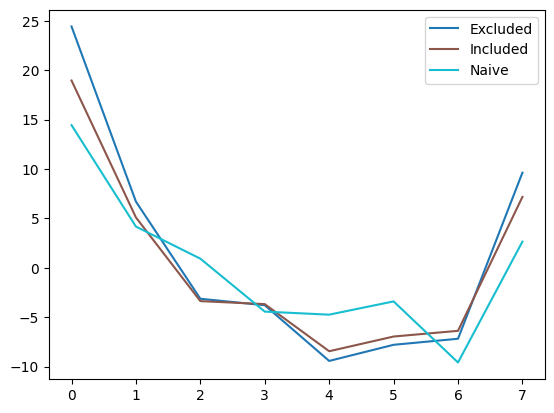

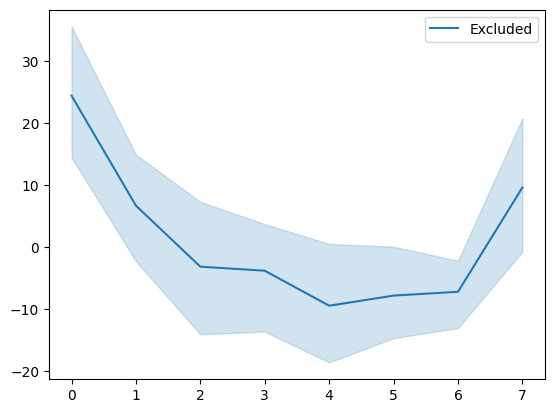

In [ ]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "COLLECT_STAR", range(48,49), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)

Reading 0 ... 954499  =      0.000 ...  1908.998 secs...
753
753
753


/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/9202195.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps


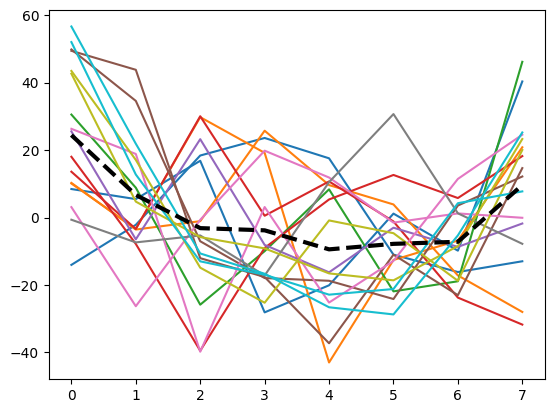

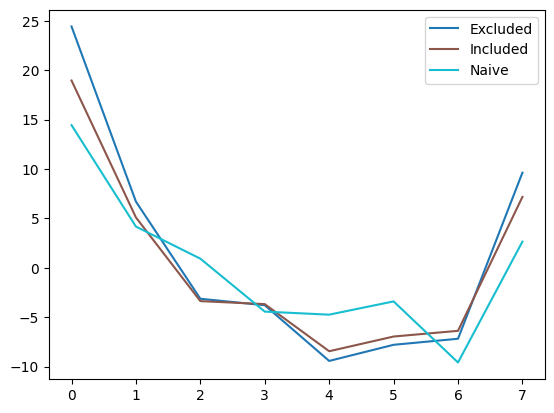

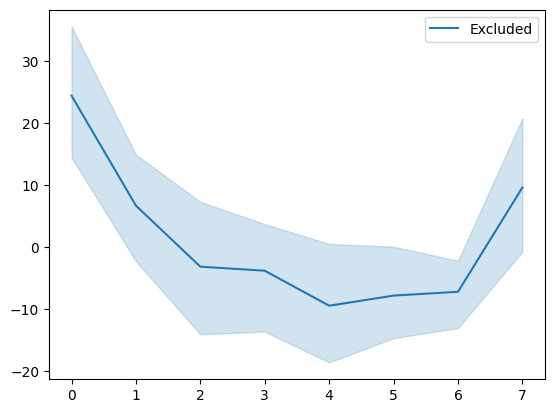

In [ ]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "COLLECT_STAR", range(48,49), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)

Reading 0 ... 954499  =      0.000 ...  1908.998 secs...
54
54
54


/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/9202195.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps


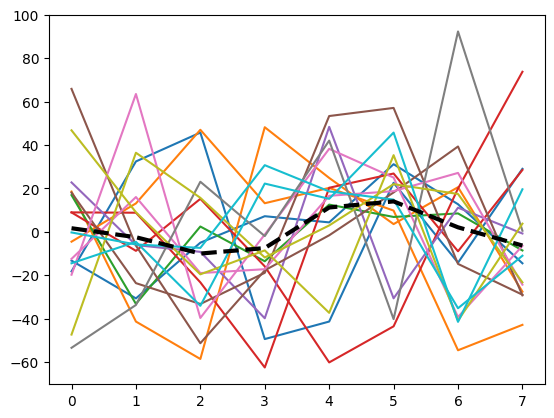

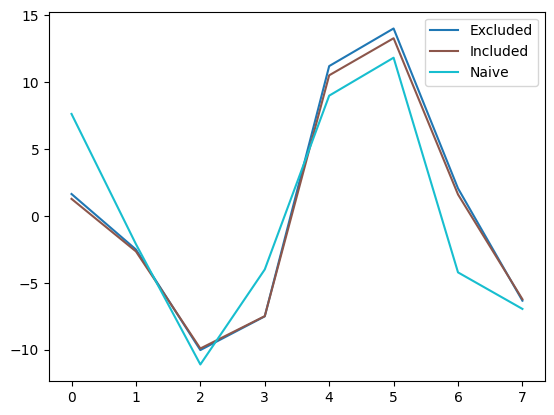

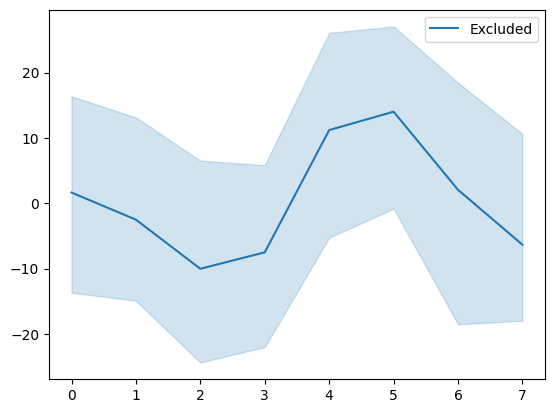

In [ ]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "COLLECT_AMMO", range(49,50), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)

Reading 0 ... 954499  =      0.000 ...  1908.998 secs...
211
211
211


/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/9202195.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps


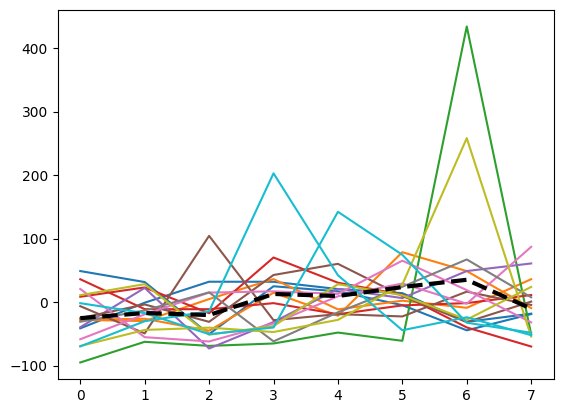

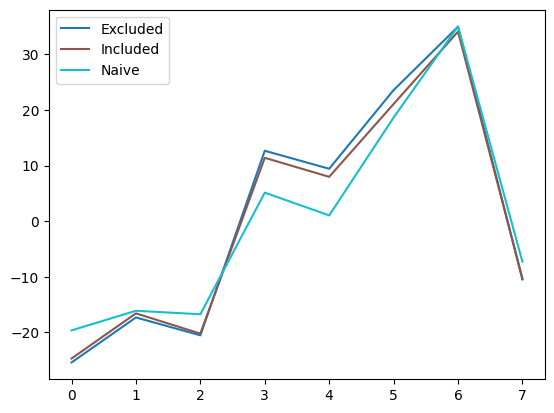

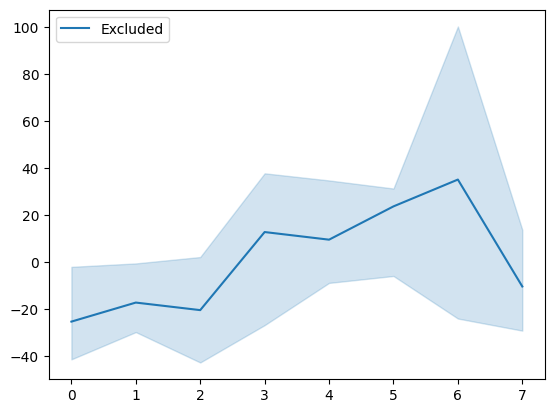

In [ ]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "PLAYER_CRASH_WALL", range(10,11), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)

Reading 0 ... 954499  =      0.000 ...  1908.998 secs...
211
211
211


/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/9202195.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps


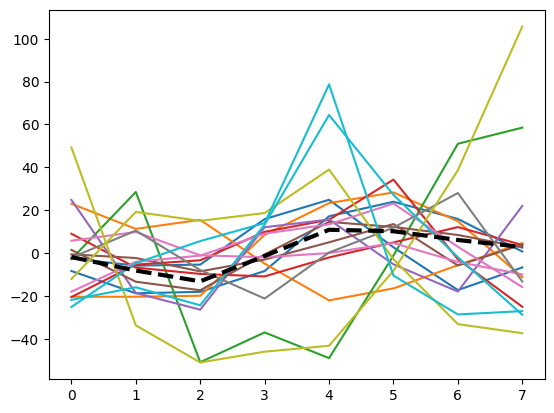

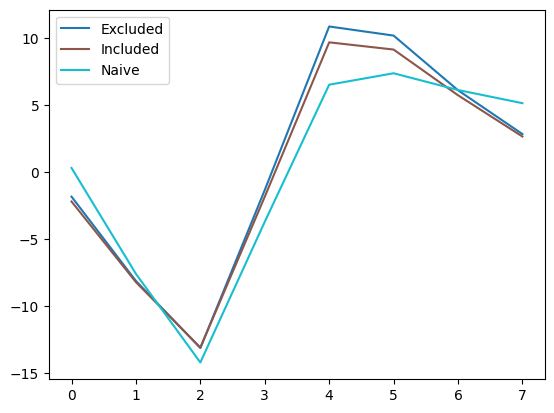

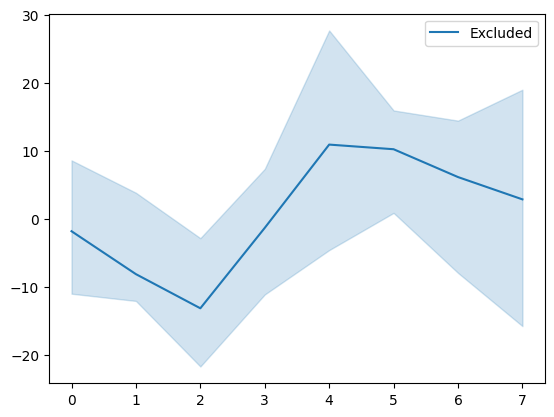

In [ ]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "PLAYER_CRASH_WALL", range(0,65), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)

Reading 0 ... 954499  =      0.000 ...  1908.998 secs...
103
103
103


/var/folders/zj/7fxv5dh53xs9bw4_55222q6c0000gn/T/ipykernel_2779/9202195.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(not_aggregated))  # You can change 'tab10' to other colormaps


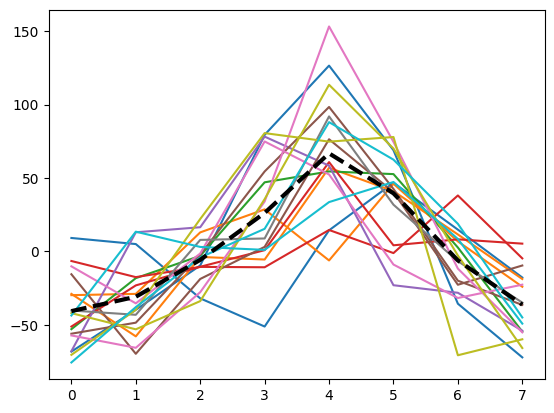

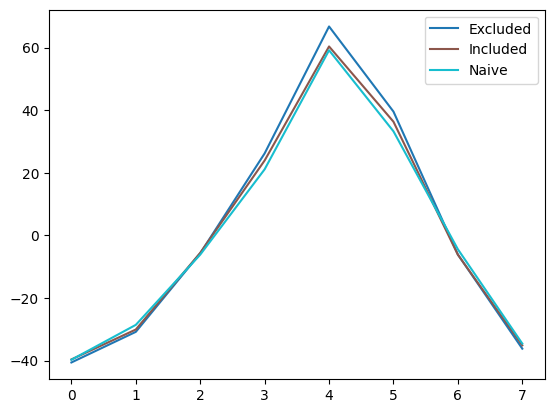

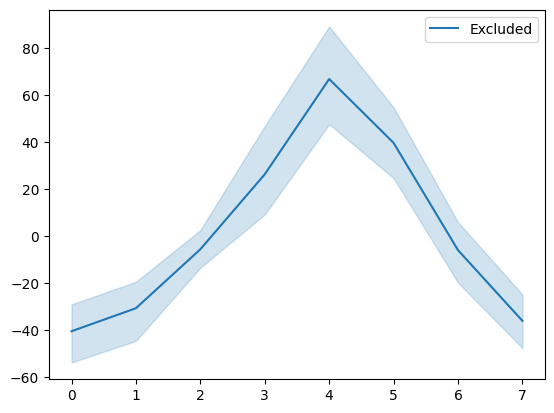

In [ ]:
aggregated, not_aggregated = get_deviation_for_subjects(17, "PLAYER_CRASH_ENEMY", range(4,5), baseline_methods=["exclude_event", "include_event", "naive"])
plot_all(aggregated, not_aggregated)